# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

How many patients? How many features?

In [2]:
features, patients = A.shape
f'There are {features} features and {patients} patients.'

'There are 4000 features and 216 patients.'

How many patiens with and without cancer are there in the dataset?

In [3]:
patients_cancer = grp == 'Cancer'

f'There are {np.sum(patients_cancer)} cancer patients and {np.sum(~patients_cancer)} healthy patients.'

'There are 121 cancer patients and 95 healthy patients.'

Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

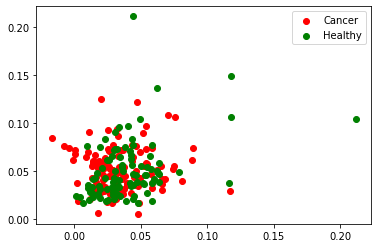

In [4]:
# Select two random numbers between 1 and 4000
protein1 = np.random.randint(0, 4000)
protein2 = np.random.randint(0, 4000)

plt.scatter(A[protein1, patients_cancer], A[protein2, patients_cancer], c='r', label='Cancer')
plt.scatter(A[protein1, ~patients_cancer], A[protein2, ~patients_cancer], c='g', label='Healthy')
plt.legend()
plt.show()

Repeat the previous point, this time by considering three proteins.

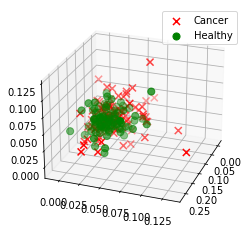

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

protein1 = np.random.randint(0, 4000)
protein2 = np.random.randint(0, 4000)
protein3 = np.random.randint(0, 4000)

ax.scatter(A[protein1, patients_cancer], A[protein2, patients_cancer], A[protein3, patients_cancer], marker='x', s=50, c='red', label='Cancer')
ax.scatter(A[protein1, ~patients_cancer], A[protein2, ~patients_cancer], A[protein3, ~patients_cancer], marker='o', s=50, c='green', label='Healthy')
ax.legend()
ax.view_init(25,20)

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Fraction of explained variance')

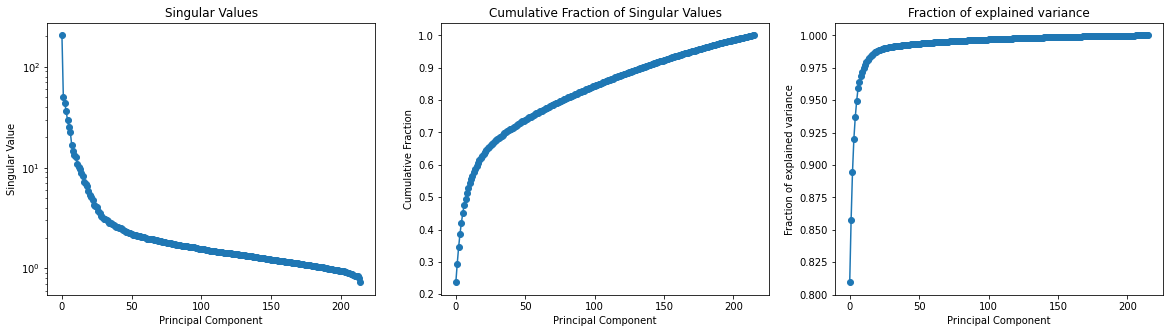

In [6]:
A_mean = np.mean(A, axis=1)
U, s, VT = np.linalg.svd(A - A_mean[:, None], full_matrices=False)

figure, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(s[:-1], '-o')
axes[0].set_yscale('log')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Singular Value')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s) / np.sum(s), '-o')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Fraction')
axes[1].set_title('Cumulative Fraction of Singular Values')


axes[2].plot(np.cumsum(s ** 2) / np.sum(s ** 2), '-o')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Fraction of explained variance')
axes[2].set_title('Fraction of explained variance')

In [7]:
U.shape, s.shape, VT.shape

((4000, 216), (216,), (216, 216))

Make a scatterplot of the first two principal components of the patients.

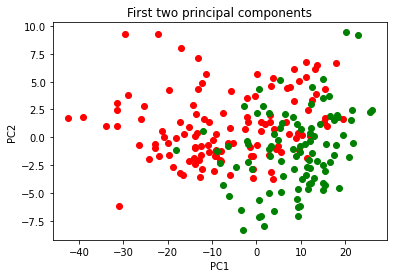

In [8]:
component1 = U[:, 0] @ (A - A_mean[:, None])
component2 = U[:, 1] @ (A - A_mean[:, None]) 

# plot the first two principal components
plt.scatter(component1[patients_cancer], component2[patients_cancer], c='r', label='Cancer')
plt.scatter(component1[~patients_cancer], component2[~patients_cancer], c='g', label='Healthy')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two principal components')
plt.show()


Make a scatterplot of the first three principal components of the patients.

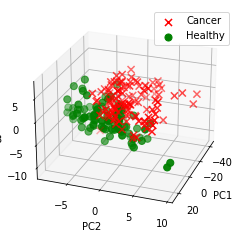

In [9]:
component3 = U[:, 2] @ (A - A_mean[:, None])
# plot the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(component1[patients_cancer], component2[patients_cancer], component3[patients_cancer], marker='x', s=50, c='red', label='Cancer')
ax.scatter(component1[~patients_cancer], component2[~patients_cancer], component3[~patients_cancer], marker='o', s=50, c='green', label='Healthy')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.view_init(25,20)

Text(0.5, 1.0, 'Fraction of explained variance')

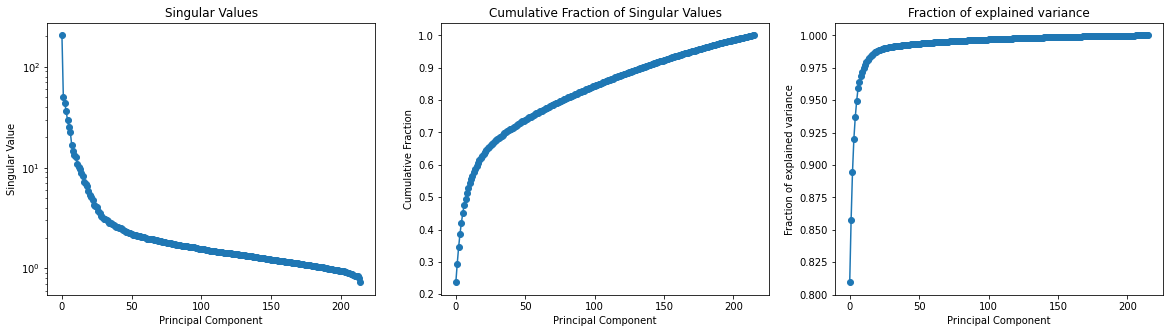

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(A.transpose())

figure, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(pca.singular_values_[:-1], '-o')
axes[0].set_yscale('log')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Singular Value')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(pca.singular_values_) / np.sum(pca.singular_values_), '-o')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Fraction')
axes[1].set_title('Cumulative Fraction of Singular Values')

axes[2].plot(np.cumsum(pca.explained_variance_ratio_), '-o')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Fraction of explained variance')
axes[2].set_title('Fraction of explained variance')


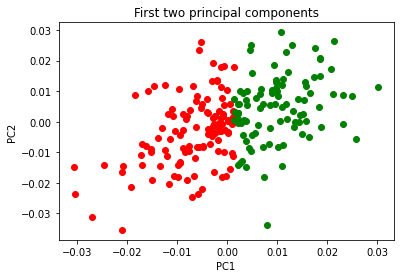

In [11]:
components = pca.components_
component1_pca_sk = components[:, 0]
component2_pca_sk = components[:, 1]

# order the components so that the indices correspond to the indices in the original matrix
order = np.argsort(component1_pca_sk)
component1_pca_sk = component1_pca_sk[order]
component2_pca_sk = component2_pca_sk[order]

# plot the first two principal components
plt.scatter(component1_pca_sk[patients_cancer], component2_pca_sk[patients_cancer], c='r', label='Cancer')
plt.scatter(component1_pca_sk[~patients_cancer], component2_pca_sk[~patients_cancer], c='g', label='Healthy')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two principal components')
plt.show()